In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
import cv2 
import os 

In [2]:
data_path = './leedsbutterfly_dataset_v1/leedsbutterfly'
class_name = ['images','segmentations']

In [3]:
def get_list_files(dirName):
    files_list = os.listdir(dirName)
    return files_list

In [4]:
file_lists = get_list_files(data_path + '/' + class_name[0])

In [5]:
len(file_lists)

832

In [6]:
def rand_img(file_lists_img):
    rand_img = np.random.randint(0,len(file_lists_img))
    img_dir = data_path + '/' + class_name[0] +'/'+ file_lists[rand_img]
    return img_dir

In [7]:
rand_img(file_lists)

'./leedsbutterfly_dataset_v1/leedsbutterfly/images/0060088.png'

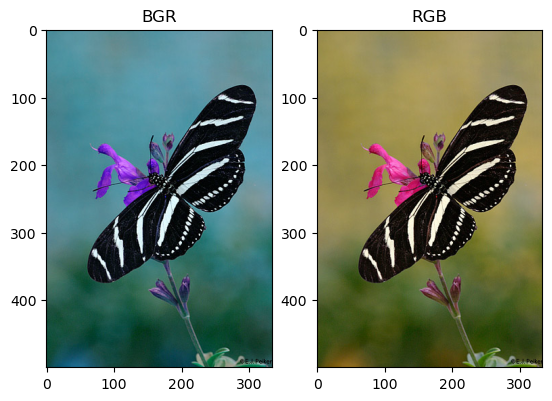

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2)
rand_img_dir = rand_img(file_lists)
imgBGR = cv2.imread(rand_img_dir)
imgRGB= cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB)
ax1.imshow(imgBGR)
ax2.imshow(imgRGB)
ax1.title.set_text('BGR')
ax2.title.set_text('RGB')
plt.show()

In [9]:
img_sample = ['0010001.png','0020003.png','0030040.png','0040002.png','0050008.png','0060054.png','0070034.png','0080057.png','0090203.png','0100157.png']

In [10]:
imgs_arr=[]
for i in img_sample:
    img =cv2.imread(data_path+'/'+class_name[0]+'/'+i)
    imgRGB= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    imgRGB=np.array(imgRGB,dtype=np.float64)/255
#     print(imgRGB.shape)
    w,h,d=tuple(imgRGB.shape)
    img_arr = np.reshape(imgRGB,(w* h, d))
    imgs_arr.append(img_arr)
    print(img_arr.shape)
#     plt.imshow(img)
#     plt.show()

(786432, 3)
(255036, 3)
(208000, 3)
(90560, 3)
(227000, 3)
(86400, 3)
(260928, 3)
(14850, 3)
(67500, 3)
(82500, 3)


In [30]:
All_pixels = np.concatenate((imgs_arr[0],imgs_arr[1],imgs_arr[2],imgs_arr[3],imgs_arr[4],imgs_arr[5],
                            imgs_arr[6],imgs_arr[7],imgs_arr[8],imgs_arr[9]))

In [31]:
All_pixels.shape

(2079206, 3)

In [32]:
image_array_sample = shuffle(All_pixels, random_state=0, n_samples=1500)
num_colors = 64
kmeans = KMeans(n_clusters=num_colors, n_init="auto", random_state=0).fit(
    image_array_sample)

In [39]:
labels3 = kmeans.predict(imgs_arr[2])

In [40]:
def recreate_img(codebook,labels,w,h):
    return codebook[labels].reshape(w,h,-1)

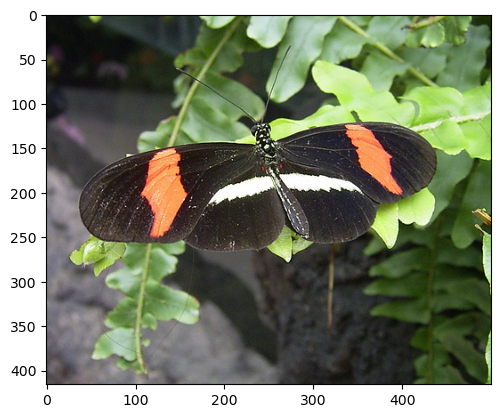

In [45]:
i1 = cv2.imread(data_path+'/'+class_name[0]+'/'+img_sample[2])
i1= cv2.cvtColor(i1,cv2.COLOR_BGR2RGB)
plt.imshow(i1)
plt.show()
i1=np.array(i1,dtype=np.float64)/255
w1, h1, d1 = tuple(i1.shape)

# i2 = cv2.imread(data_path+'/'+class_name[1] +'/'+'0030040_seg0.png')
# i2= cv2.cvtColor(i2,cv2.COLOR_BGR2RGB)
# i2 =np.array(i2,dtype=np.float64)/255

# # print(i1)
# i3 = i1*i2
# plt.imshow(i3)
# plt.show()

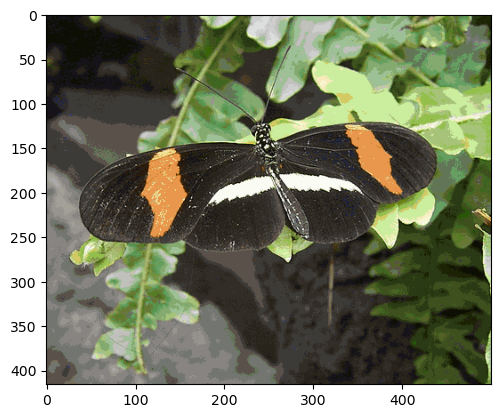

In [43]:
new_image3= recreate_img(kmeans.cluster_centers_, labels3, w1, h1)
plt.imshow(new_image3)
plt.show()

In [20]:
def crop_img(img):
    mask = img!=0
    mask = mask.any(2)
    mask0, mask1 = mask.any(0), mask.any(1)
    colstart, colend = mask0.argmin(), len(mask0) - mask0[::-1].argmin()+1
    rowstart, rowend = mask1.argmin(), len(mask1) - mask1[::-1].argmin()+1
    return img[rowstart:rowend, colstart:colend]

In [46]:
color_histogram1 = np.histogram(labels1, bins=np.arange(0,num_colors))[0]/(w1*h1)

In [47]:
color_histogram1

array([3.75000000e-02, 7.69230769e-04, 1.93269231e-03, 0.00000000e+00,
       1.51105769e-02, 7.08173077e-03, 1.25865385e-02, 2.32211538e-03,
       3.28846154e-03, 0.00000000e+00, 1.26346154e-02, 5.62980769e-03,
       9.89423077e-03, 3.93269231e-03, 3.01634615e-02, 4.23557692e-03,
       1.35812500e-01, 2.80288462e-03, 1.32692308e-03, 0.00000000e+00,
       4.64903846e-03, 2.69711538e-03, 2.00336538e-02, 4.04759615e-02,
       0.00000000e+00, 1.65000000e-02, 2.16346154e-04, 2.16730769e-02,
       7.80480769e-02, 0.00000000e+00, 7.69230769e-04, 0.00000000e+00,
       5.60096154e-03, 6.63846154e-02, 1.13509615e-02, 3.01442308e-03,
       8.87019231e-03, 6.55336538e-02, 1.78365385e-03, 0.00000000e+00,
       6.20673077e-03, 1.94711538e-03, 6.17307692e-03, 1.23557692e-03,
       3.79807692e-04, 1.64793269e-01, 5.32211538e-03, 5.91634615e-02,
       1.37836538e-02, 1.11370192e-01, 4.50000000e-03, 9.75961538e-04,
       2.23028846e-02, 6.00961538e-04, 1.04182692e-01, 4.37500000e-04,
      

In [48]:
target=[]
images=[]
flat_data1=[]
flat_data2=[]

path = os.path.join(data_path,class_name[0])
for img in os.listdir(path):
    imgBGR = cv2.imread(os.path.join(path,img))
    imgRGB = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB)
    imgRGB = np.array(imgRGB,dtype=np.float64)/255
    w, h, d = tuple(imgRGB.shape)
    img_arr = np.reshape(imgRGB,(w* h, d))
    clus_img = kmeans.predict(img_arr)
    new_img = recreate_img(kmeans.cluster_centers_, clus_img, w, h)
    color_histogram = np.histogram(clus_img, bins=np.arange(0,num_colors))[0]/(w*h)
#     new_img=np.array(new_img,dtype=np.float64)/255

    
    flat_data1.append(color_histogram.flatten())
#     flat_data2.append(new_img)
    target.append(int(os.path.join(path,img)[51:53]))

flat_data1 = np.array(flat_data1)
# flat_data2 = np.array(flat_data2)
target = np.array(target)

In [49]:
print(len(flat_data1))
print(len(flat_data2))
print(len(target))

832
0
832


<BarContainer object of 10 artists>

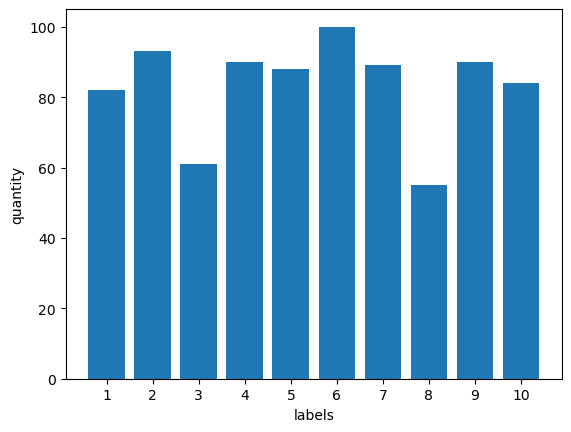

In [50]:
cla = ['1','2','3','4','5','6','7','8','9','10']
unique,count = np.unique(target,return_counts=True)
plt.xlabel('labels')
plt.ylabel('quantity')
plt.bar(cla,count)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data1,target,test_size=0.3)

In [52]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
y_pred=model1.predict(x_test)
model1.score(x_test,y_test)

0.496

In [54]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
model2.score(x_test,y_test)

0.216

In [ ]:
# Do phần nền lớn gồm các cây, lá màu xanh nên histogram ảnh bị sai. 

# Cần sử dụng mặt nạ trong 'segmentation' nhưng mặt nạ đó có viền là màu đỏ rồi mới đến nền đen nên lúc cắt ảnh cần chú ý.

# Sau đó mới phân đoạn màu mắc để phân loại. 